0.09370241819843417
Accuracy 0.9215686274509803 
Precision: 0.9615384615384616 
Recall: 0.8928571428571429


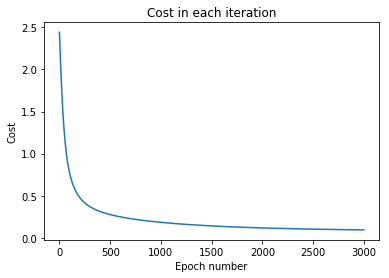

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

#to read file
df=pd.read_csv('wdbc.dataset',header=None)

df[1] = df[1].map({'M':0,'B':1}) #replacing values of M and B with 0 and 1 

x=df.iloc[:,2:].values
y=df.iloc[:,1:2].values
from sklearn import preprocessing #for standardization
std_scale = preprocessing.StandardScaler().fit(x)
x=std_scale.transform(x)


X_val,X_rem,y_val,y_rem= train_test_split(x,y,test_size=0.9,random_state=1) #partitioning data

X_test, X_train, y_test, y_train = train_test_split(X_rem,y_rem,test_size=0.9,random_state=1)

#below transposing all the data required for computation
X_train =X_train.T 
y_train =  y_train.T
X_val = X_val.T
y_val = y_val.T
X_test= X_test.T
y_test = y_test.T

#calculating sigmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

#to find out the cost value
def cost_return(inputval,outputval,iterations,l_rate):
    global w,b
    epochs = iterations
    ll = l_rate
    losstrack = []
    w = np.random.randn(X_train.shape[0], 1)
    b = 0

    m = inputval.shape[1]
    for epoch in range(epochs):
        z = np.dot(w.T,inputval) + b
        p = sigmoid(z)
        cost = -np.sum(np.multiply(np.log(p), outputval) + np.multiply((1 - outputval), np.log(1 - p)))/m
        losstrack.append(np.squeeze(cost))
        dz = p-outputval
        dw = (1 / m) * np.dot(inputval, dz.T)
        db = (1 / m) * np.sum(dz)
        w = w - ll * dw
        b = b - ll * db
    plt.plot(losstrack)#plotting cost-echo graph using matplotlib module
    plt.title("Cost in each iteration")
    plt.xlabel("Epoch number")
    plt.ylabel("Cost")
    return cost

print(cost_return(X_train,y_train,3000,0.007))#calling the cost_return function

def classifier(inputval,outputval):
    z=np.dot(w.T,inputval)+b
    pf = sigmoid(z)
    out= (pf > 0.5).astype(int)
    return out 


test_clf = classifier(X_test,y_test)

tn,fp,fn,tp=confusion_matrix(y_test[0], test_clf[0]).ravel() #in-built sklearn confusion matrix function 

def eval_metrics(tn,fp,fn,tp):
    accuracy=(tp+tn)/(tp+tn+fp+fn)
    recall=tp/(tp+fn)
    precision=tp/(tp+fp)
    print("Accuracy",accuracy,"\nPrecision:",precision,"\nRecall:",recall)
eval_metrics(tn, fp, fn, tp) 

    